In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [4]:
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
model = ChatGroq(model="qwen/qwen3-32b")
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001F01DC00F10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001F01DC03310>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [10]:
from langchain_tavily import TavilySearch

tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general"
)
tavily_search_tool.invoke("what is the current AI news?")

{'query': 'what is the current AI news?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
   'title': 'The Latest AI News and AI Breakthroughs that Matter Most',
   'content': 'Summary: Purdue University researchers introduced RAPTOR, an AI-powered defect-detection system combining high-resolution X-ray imaging and machine learning.',
   'score': 0.71687365,
   'raw_content': None},
  {'url': 'https://www.reuters.com/technology/artificial-intelligence/',
   'title': 'AI News | Latest Headlines and Developments',
   'content': 'Explore the latest artificial intelligence news with Reuters - from AI breakthroughs and technology trends to regulation, ethics, business and global',
   'score': 0.6625569,
   'raw_content': None},
  {'url': 'https://www.artificialintelligence-news.com/',
   'title': 'AI News | Latest News | Insights Powering AI-Driven Business ...',
   'content': 'Gartner Data & Anal

In [9]:
tool

<function langchain_core.tools.convert.tool(name_or_callable: str | collections.abc.Callable | None = None, runnable: langchain_core.runnables.base.Runnable | None = None, *args: Any, description: str | None = None, return_direct: bool = False, args_schema: type[pydantic.main.BaseModel] | dict[str, typing.Any] | None = None, infer_schema: bool = True, response_format: Literal['content', 'content_and_artifact'] = 'content', parse_docstring: bool = False, error_on_invalid_docstring: bool = True, extras: dict[str, typing.Any] | None = None) -> langchain_core.tools.base.BaseTool | collections.abc.Callable[[collections.abc.Callable | langchain_core.runnables.base.Runnable], langchain_core.tools.base.BaseTool]>

In [6]:
from langchain.tools import tool

@tool("calculator", description="Performs arithmetic calculations. Use this for any math problems.")
def calc(expression: str) -> str:
    """Evaluate mathematical expressions."""
    return str(eval(expression))

In [7]:
tool

<function langchain_core.tools.convert.tool(name_or_callable: str | collections.abc.Callable | None = None, runnable: langchain_core.runnables.base.Runnable | None = None, *args: Any, description: str | None = None, return_direct: bool = False, args_schema: type[pydantic.main.BaseModel] | dict[str, typing.Any] | None = None, infer_schema: bool = True, response_format: Literal['content', 'content_and_artifact'] = 'content', parse_docstring: bool = False, error_on_invalid_docstring: bool = True, extras: dict[str, typing.Any] | None = None) -> langchain_core.tools.base.BaseTool | collections.abc.Callable[[collections.abc.Callable | langchain_core.runnables.base.Runnable], langchain_core.tools.base.BaseTool]>

In [11]:
from langchain.agents import create_agent

agent = create_agent(
    model=model,
    tools=[tavily_search_tool, calc],
)

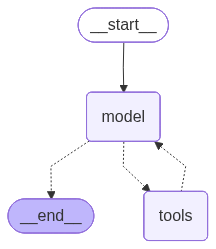

In [12]:
agent

In [13]:
user_input = "What is the current AI news and what is 123 * 456?"

for step in agent.stream(
    {"messages": user_input},
    stream_mode="values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is the current AI news and what is 123 * 456?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (bbmqdhdsm)
 Call ID: bbmqdhdsm
  Args:
    query: current AI news
    time_range: day
    topic: news
  calculator (esy84jenj)
 Call ID: esy84jenj
  Args:
    expression: 123 * 456
================================= Tool Message =================================
Name: calculator

56088
================================== Ai Message ==================================

**Current AI News (as of Jan 2026):**  
1. **ScienceDaily**: New research shows AI can mimic human brain behavior with less training data.  
2. **Forbes**: Agentic AI is projected to handle 40% of workflows by 2026, driving innovations in specialized hardware.  
3. **TechNewsWorld**: AI adoption in broadband providers and concerns about "AI washing" in marketing.  
4. **The Guardian**: 

In [15]:
agent.invoke({'messages':"What is the current news on Anthropic and what is 123 / 23?"})['messages'][-1].pretty_print()

================================== Ai Message ==================================

Here's the latest information on Anthropic and the calculation result:

**Anthropic News (February 2026):**
1. **$380B Valuation:** Raised $30B in Series G funding led by GIC and Coatue, doubling its valuation from $183B to $380B.
2. **Claude's Advancements:** Launched Claude Opus 4.6 - leading in economically valuable knowledge work tasks (finance/legal domains) and powering agents for enterprise workflows.
3. **Revenue Growth:** Achieved $14B annual run-rate revenue, growing 10x annually for 3 consecutive years.
4. **Regulatory Stance:** Donated $20M to support AI regulation advocacy, contrasting with some industry peers' positions.
5. **Strategic Caution:** CEO Dario Amodei emphasized cautious spending due to risks in AI growth forecasting, despite revenue projections reaching $10B+ in 2026.

**Calculation Result:**  
123 ÷ 23 = **5.3478260869565215**

The search results indicate Anthropic is solidifyi